In [2]:
!pip install transformers spacy


In [22]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [30]:
import pandas as pd
from transformers import pipeline
import spacy

#Loading data from the local file
from google.colab import files
uploaded  = files.upload()

Saving User_Feedback.xlsx to User_Feedback (1).xlsx


In [31]:
#Loading the user feedback from an Excel file and creating a dataframe
df = pd.read_excel('User_Feedback.xlsx')
df

,Feedback
0,"""The weekly distance targets can be discouragi..."
1,"""The app could provide more guidance on how to..."
2,“The reminders feature doesn’t always send me ...
3,"""There isn’t enough post-run analysis. I'd app..."
4,"""The app is missing advanced training features..."
5,"""Heart rate data is tracked, but the app doesn..."
6,"""Setting weekly distance targets is useful, bu..."
7,"""The app’s social sharing features are quite b..."
8,"""The reminders to run are helpful, but they la..."
9,"""I'm concerned about the safety of sharing my ..."


In [32]:
#Initializing sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

#Performing sentiment analysis on the feedback
df['Sentiment'] = df['Feedback'].apply(lambda x: sentiment_pipeline(x)[0]['label'])
df['Sentiment_Score'] = df['Feedback'].apply(lambda x: sentiment_pipeline(x)[0]['score'])

#Printing the DataFrame to check the results
df

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


,Feedback,Sentiment,Sentiment_Score
0,"""The weekly distance targets can be discouragi...",POSITIVE,0.737890
1,"""The app could provide more guidance on how to...",NEGATIVE,0.999124
2,“The reminders feature doesn’t always send me ...,NEGATIVE,0.998985
3,"""There isn’t enough post-run analysis. I'd app...",POSITIVE,0.878386
4,"""The app is missing advanced training features...",NEGATIVE,0.999780
5,"""Heart rate data is tracked, but the app doesn...",NEGATIVE,0.997798
6,"""Setting weekly distance targets is useful, bu...",POSITIVE,0.994520
7,"""The app’s social sharing features are quite b...",POSITIVE,0.995973
8,"""The reminders to run are helpful, but they la...",NEGATIVE,0.999428
9,"""I'm concerned about the safety of sharing my ...",NEGATIVE,0.910105


In [33]:
import nltk
nltk.download('punkt')

# Function to split feedback into sentences
def split_sentences(feedback):
    sentences = nltk.sent_tokenize(feedback)
    return sentences

# Split feedback into sentences and create new rows
rows = []
for index, row in df.iterrows():
    sentences = split_sentences(row['Feedback'])
    for sentence in sentences:
        new_row = {
            'Feedback': sentence,
            'Sentiment': row['Sentiment'],
            'Sentiment_Score': row['Sentiment_Score']
        }
        rows.append(new_row)

# Create a new DataFrame with split sentences
new_df = pd.DataFrame(rows)
new_df

#Performing sentiment analysis on the feedback again as the feedback wa split into sentences
new_df['Sentiment'] = new_df['Feedback'].apply(lambda x: sentiment_pipeline(x)[0]['label'])
new_df['Sentiment_Score'] = new_df['Feedback'].apply(lambda x: sentiment_pipeline(x)[0]['score'])

#Printing the DataFrame to check the results
new_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Feedback,Sentiment,Sentiment_Score
0,"""The weekly distance targets can be discouragi...",NEGATIVE,0.992771
1,I’d like more flexibility in setting achievabl...,POSITIVE,0.949957
2,"""The app could provide more guidance on how to...",NEGATIVE,0.997661
3,"As a beginner, I’m not sure what these mean fo...",NEGATIVE,0.999214
4,“The reminders feature doesn’t always send me ...,NEGATIVE,0.998985
5,"""There isn’t enough post-run analysis.",NEGATIVE,0.999347
6,I'd appreciate more detailed feedback on my pe...,POSITIVE,0.997356
7,"""The app is missing advanced training features...",NEGATIVE,0.999780
8,"""Heart rate data is tracked, but the app doesn...",NEGATIVE,0.997798
9,"""Setting weekly distance targets is useful, bu...",POSITIVE,0.994520


In [21]:
!pip install wordcloud spacy


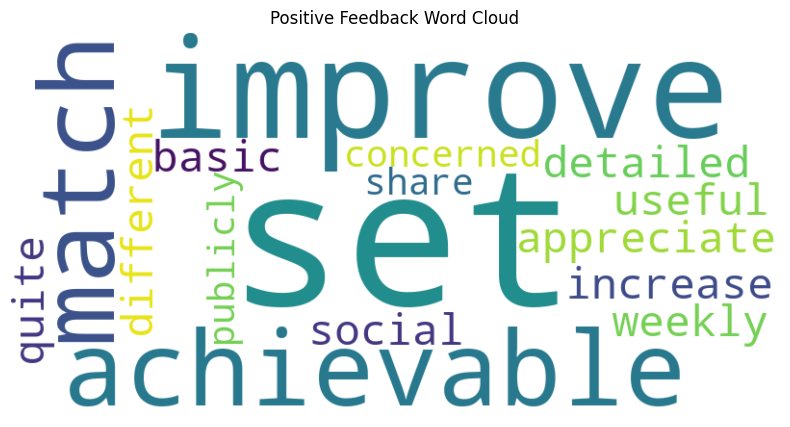

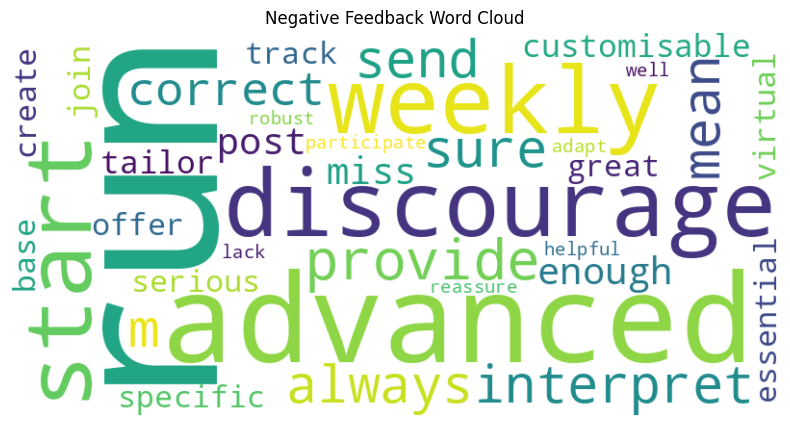

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

#Loading spaCy model
nlp = spacy.load("en_core_web_sm")


#Extracting positive and negative feedback
positive_feedback = new_df[new_df['Sentiment'] == 'POSITIVE']['Feedback'].tolist()
negative_feedback = new_df[new_df['Sentiment'] == 'NEGATIVE']['Feedback'].tolist()

#Function to extract words
def extract_words(feedback):
    words = []
    for doc in nlp.pipe(feedback):
        for token in doc:
            if token.pos_ in ['ADJ', 'ADV', 'VERB']:
                words.append(token.lemma_)
    return words

#Extracting words from positive and negative feedback
positive_words = extract_words(positive_feedback)
negative_words = extract_words(negative_feedback)

#Generating word clouds
def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

#Displaying word clouds
generate_wordcloud(positive_words, 'Positive Feedback Word Cloud')
generate_wordcloud(negative_words, 'Negative Feedback Word Cloud')

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

#Existing features of the app
existing_features = [
    "weekly distance targets",
    "GPS tracking",
    "running routes of 5k, 10k, 20k routes on a map before setting off",
    "reminders feature",
    "Tracking metrics about a particular run including pace, heart rate, stride length, and cadence (when using a compatible watch) ",
    "privacy settings",
    "safety",
    "social sharing"
]


#Loading spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to compare feedback with existing features
def analyze_feedback(feedback, existing_features):
    doc = nlp(feedback.lower())
    pain_points = []

    # Check for mentions of existing features
    for feature in existing_features:
        if feature in feedback.lower():
            pain_points.append(feature)

    return pain_points

# Apply analysis to each feedback sentence
new_df['Pain_Points'] = new_df['Feedback'].apply(lambda x: analyze_feedback(x, existing_features))


# Print the DataFrame with analysis results
new_df[['Feedback', 'Pain_Points']]

,Feedback,Pain_Points
0,"""The weekly distance targets can be discouragi...",[weekly distance targets]
1,I’d like more flexibility in setting achievabl...,[]
2,"""The app could provide more guidance on how to...",[]
3,"As a beginner, I’m not sure what these mean fo...",[]
4,“The reminders feature doesn’t always send me ...,[reminders feature]
5,"""There isn’t enough post-run analysis.",[]
6,I'd appreciate more detailed feedback on my pe...,[]
7,"""The app is missing advanced training features...",[]
8,"""Heart rate data is tracked, but the app doesn...",[]
9,"""Setting weekly distance targets is useful, bu...",[weekly distance targets]


In [39]:
from collections import Counter

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to extract competitor feature mentions
def extract_competitor_features(feedback):
    doc = nlp(feedback.lower())
    features = []
    for sent in doc.sents:
        if "but" in sent.text or "however" in sent.text or sent.text.startswith("i'd") or sent.text.startswith("it would be") or sent.text.startswith("i'd like"):
            features.append(sent.text.strip())
    return features


# Apply function to extract competitor feature mentions
new_df['Competitor_Features'] = new_df['Feedback'].apply(extract_competitor_features)

new_df

,Feedback,Sentiment,Sentiment_Score,Pain_Points,Competitor_Features
0,"""The weekly distance targets can be discouragi...",NEGATIVE,0.992771,[weekly distance targets],[]
1,I’d like more flexibility in setting achievabl...,POSITIVE,0.949957,[],[]
2,"""The app could provide more guidance on how to...",NEGATIVE,0.997661,[],[]
3,"As a beginner, I’m not sure what these mean fo...",NEGATIVE,0.999214,[],[]
4,“The reminders feature doesn’t always send me ...,NEGATIVE,0.998985,[reminders feature],[]
5,"""There isn’t enough post-run analysis.",NEGATIVE,0.999347,[],[]
6,I'd appreciate more detailed feedback on my pe...,POSITIVE,0.997356,[],[i'd appreciate more detailed feedback on my p...
7,"""The app is missing advanced training features...",NEGATIVE,0.999780,[],[]
8,"""Heart rate data is tracked, but the app doesn...",NEGATIVE,0.997798,[],"[""heart rate data is tracked, but the app does..."
9,"""Setting weekly distance targets is useful, bu...",POSITIVE,0.994520,[weekly distance targets],"[""setting weekly distance targets is useful, b..."
